# Questão 3


## Relatório do Trabalho feito

Nesta atividade realizei uma sequencia de 6 experimentos para observar as mudanças de desempenho comparado com alterações na arquitetura do modelo.

### Experimento 1

Inicialmente avaliei a influência do número de neurônios na unica camada Dense (256,512,1024,2048).
Nesta etapa a camada com 512 neurônios obteve um resultado melhor na precisão do Teste, já as camadas com mais neurônios obtiveram uma performance melhor na precisão do Treinamento.

### Experimento 2

Nesta segunda etapa, sugeri diferentes aquiteturas utilizando mais camadas para encontrar melhoras no desempenho. Dentre as sugestoes colocadas no experimento, o modelo 0, com 2 camadas (1042 e 128 neurônios) e um dropout (0,5) obteve o melhor desempenho.

### Experimento 3

No Experimento 3, avaliei o desempenho de diferentes posições e quantidade de camadas Dropout no modelo com  a melhor performance do Experimento 2. Assim como resultado, a arquitetura já proposta pelo Experimento 2 sucedeu na melhor performance durante o Teste.

### Experimento 4

Seguindo, observei a influência do valor do Dropout na arquitetura, variando a camada Dropout de 0 a 0,8. Dessa forma, obteve-se o melhor desempenho no Teste utilizando o Dropout (0.2).

### Experimento 5

A seguir, foi proposto a implementação do Batch Normalization, introduzindo-o na arquitetura no lugar do Dropout ou junto ao Dropout. 
Para essa etapa foi utilizado mais Epochs de treinamento, o que influenciou numa grande melhora comparado ao Experimento 4.
Comparando os resultados das arquiteturas propostas pelo experimento 5, observou-se que a utilização do Dropout(0,2)+BatchNormalization resultou numa melhora na performance dos resultados.

### Experimento 6

Como ultimo experimento, foi utilizado diferentes valores do batch_size com apenas 5 Epochs. 
Nesse experimento valores mais altos de batch_size resultaram numa melhora da performance da arquitetura.

### Final

Para finalizar, foi utilizado todos os melhores resultados observados nos Experimentos e sintetizado uma versão final do modelo de aprendizado.
Para essa etapa foi utilizado 20 Epochs de treinamento.

Os valores de precisão no Teste estão representados na Tabela abaixo:

| |Precisão no Teste (%)|
|---|---|
|Roteiro|97,75|
|Experimento 1|97,98|
|Experimento 2|97,95|
|Experimento 3|98,11|
|Experimento 4|98,09|
|Experimento 5|98,24|
|Experimento 6|97,85|
|Final|98,50|

# Inicio da Atividade

# Roteiro

Inicialmente vamos observar os resultados de acurácia do modelo proposto no roteiro da Questão 3

## Treino (Roteiro)

In [1]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

hist_t = model.fit(x_train, y_train, epochs=5)


model_json = model.to_json()
json_file = open("model_MLP.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP.h5")
print("Model saved to disk")
os.getcwd()

W0429 16:46:14.684671 15140 deprecation.py:506] From D:\Anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2665 - acc: 0.9204
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1355 - acc: 0.9586
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1093 - acc: 0.9660
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0918 - acc: 0.9714
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0837 - acc: 0.9734
Model saved to disk


'C:\\Users\\T-Gamer\\Dropbox\\Aulas Doc\\EFC2\\Q3'

## Teste (Roteiro)

In [2]:
m = model.evaluate(x_test, y_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = m[metric_i]
    print('{}: {}'.format(metric_name, metric_value))  

10000/10000 [==============================] - 0s 32us/sample - loss: 0.0686 - acc: 0.9775
loss: 0.06861142724509119
acc: 0.9775000214576721


## Análise da curva de aprendizado (Roteiro)

Como o foco do projeto é a análise do ganho de desempenho, irei plotar somente a curva da acurácia pelo numero de epochs

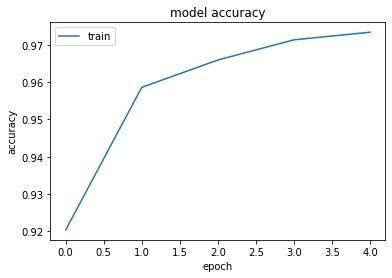

In [4]:
import matplotlib.pyplot as plt

plt.plot(hist_t.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Atividade

Para encontrar uma arquitetura que promova um melhor desempenho, irei realizar alguns experimentos a fim de analisar a variação de texa de acerto baseado em diferentes arquiteturas.

## Dados

In [2]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

## Experimento 1

Primeiro irei avaliar a influencia do numero de neuronios na camada Dense

In [52]:
model = [0,0,0,0]
m = {}
hist_all={}
print('Inicio do Experimento 1')
for i in range(len(model)):
    if i==0:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 0')
    if i==1:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 1')
    if i==2:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 2')
    if i==3:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(2048, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 3')

Inicio do Experimento 1
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3117 - acc: 0.9075
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1647 - acc: 0.9496
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1312 - acc: 0.9599
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1126 - acc: 0.9656
Epoch 5/5
10000/10000 [==============================] - 1s 74us/sample - loss: 0.0730 - acc: 0.9785
Fim do treinamento i = 0
Epoch 1/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2713 - acc: 0.9190
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1374 - acc: 0.9584
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1095 - acc: 0.9663
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.0924 - acc: 0.9710
Epoch 5/5
10000/10000 [===================

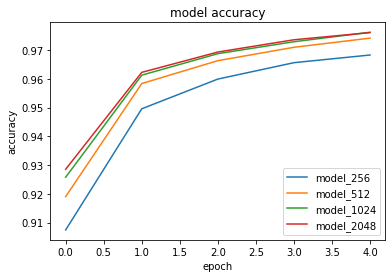

Model: 0 Treino: 0.968267 Teste: 0.978500
Model: 1 Treino: 0.974133 Teste: 0.979800
Model: 2 Treino: 0.976183 Teste: 0.978600
Model: 3 Treino: 0.976050 Teste: 0.978100


In [54]:
import matplotlib.pyplot as plt
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_256','model_512','model_1024','model_2048'], loc='best')
plt.show()

for i in range(len(model)):
    print('Model: %d Treino: %f Teste: %f' %(i, hist_all[i].history['acc'][len(model)], m[i][1]))

    

Como podemos observar, as camadas com mais neuronios resultaram num melhor desempenho na acurácia do Treino. Entretanto, na precisão do Teste, o modelo com 512 neurônios obteve o melhor resultado. 

## Experimento 2

A seguir será analisado a influencia de mais camadas Dense na arquitetura 

In [55]:
model = [0,0,0,0]
hist_all={}
m = {}
print('Inicio do Experimento 2')
for i in range(len(model)):
    if i==0:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 0')
    if i==1:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            tf.keras.layers.Dense(256, activation=tf.nn.relu),
            tf.keras.layers.Dense(256, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 1')
    if i==2:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 2')
    if i==3:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(64, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 3')

Inicio do Experimento 2
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2110 - acc: 0.9374
Epoch 2/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0960 - acc: 0.9706
Epoch 3/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0696 - acc: 0.9787
Epoch 4/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0564 - acc: 0.9829
Epoch 5/5
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0944 - acc: 0.9780
Fim do treinamento i = 0
Epoch 1/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2277 - acc: 0.9318
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.1039 - acc: 0.9709
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0776 - acc: 0.9776
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0604 - acc: 0.9821
Epoch 5/5
10000/10000 [===================

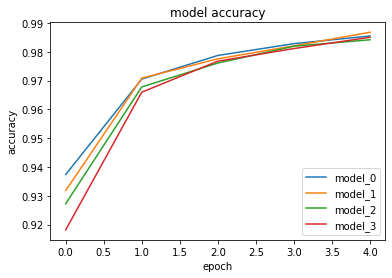

Model: 0 Treino: 0.985517 Teste: 0.978000
Model: 1 Treino: 0.986817 Teste: 0.975700
Model: 2 Treino: 0.984200 Teste: 0.979500
Model: 3 Treino: 0.985067 Teste: 0.978600


In [56]:
import matplotlib.pyplot as plt
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_0','model_1','model_2','model_3'], loc='best')
plt.show()

for i in range(len(model)):
    print('Model: %d Treino: %f Teste: %f' %(i, hist_all[i].history['acc'][len(model)], m[i][1]))

Observamos um ganho de desempenho utilizando mais camadas, principalmente utilizando a arquitetura demonstrada no modelo i = 2
Vale destacar que existem inumeras sequencias de camadas possiveis que atingam um melhor desempenho. Os experimentos servem para observar a mudança de desempenho variando a arquitetura.

## Experimento 3

Neste momento, utilizando o modelo i=1, irei implementar camadas de Dropouts na arquitetura para observar as mudanças de desempenho.

In [59]:
model = [0,0,0,0]
hist_all={}
m= {}
print('Inicio do Experimento 3')
for i in range(len(model)):
    if i==0:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 0')
    if i==1:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 1')
    if i==2:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 2')
    if i==3:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 3')

Inicio do Experimento 3
Epoch 1/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2503 - acc: 0.9257
Epoch 2/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.1098 - acc: 0.9680
Epoch 3/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0793 - acc: 0.9768
Epoch 4/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0620 - acc: 0.9818
Epoch 5/5
10000/10000 [==============================] - 1s 84us/sample - loss: 0.0842 - acc: 0.9811
Fim do treinamento i = 0
Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3315 - acc: 0.8996
Epoch 2/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.1797 - acc: 0.9478
Epoch 3/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.1475 - acc: 0.9569
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1268 - acc: 0.9629
Epoch 5/5
10000/10000 [==============

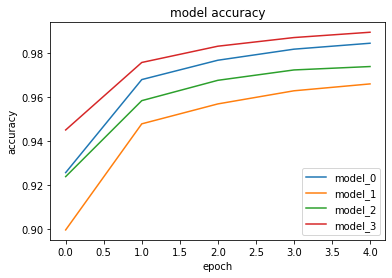

Model: 0 Treino: 0.984517 Teste: 0.981100
Model: 1 Treino: 0.966017 Teste: 0.979100
Model: 2 Treino: 0.973917 Teste: 0.978400
Model: 3 Treino: 0.989517 Teste: 0.980700


In [60]:
import matplotlib.pyplot as plt
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model_0','model_1','model_2','model_3'], loc='best')
plt.show()

for i in range(len(model)):
    print('Model: %d Treino: %f Teste: %f' %(i, hist_all[i].history['acc'][len(model)], m[i][1]))

Neste experimento, o modelo 0 ( Um Dropout(0.5) ) teve uma leve melhora na performance comparado com o modelo 3 ( sem Dropout).

## Experimento 4

Com os resultados do Experimento 3, iremos observar o efeito do Dropout na arquitetura que estamos testando.

In [61]:
model = [0]*9
hist_all={}
m = {}
print('Inicio do Experimento 4')
for i in range(len(model)):
    model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dropout(i*0.1),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

    model[i].compile(optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    hist = model[i].fit(x_train, y_train, epochs=5)
    hist_all[i]=hist
    m[i] = model[i].evaluate(x_test, y_test)
    print('Fim do treinamento i = ', i)

Inicio do Experimento 4
Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1814 - acc: 0.9448
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0759 - acc: 0.9758
Epoch 3/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0537 - acc: 0.9826
Epoch 4/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0369 - acc: 0.9882
Epoch 5/5
10000/10000 [==============================] - 1s 94us/sample - loss: 0.0689 - acc: 0.9807
Fim do treinamento i =  0
Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1892 - acc: 0.9426
Epoch 2/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0823 - acc: 0.9746
Epoch 3/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0565 - acc: 0.9819
Epoch 4/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0440 - acc: 0.9858
Epoch 5/5
10000/10000 [==============

W0429 22:16:07.057128 18124 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Epoch 1/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2781 - acc: 0.9214
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1197 - acc: 0.9654
Epoch 3/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0857 - acc: 0.9755
Epoch 4/5
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0672 - acc: 0.9806
Epoch 5/5
10000/10000 [==============================] - 1s 103us/sample - loss: 0.0878 - acc: 0.9797


W0429 22:16:39.614463 18124 nn_ops.py:4224] Large dropout rate: 0.7 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Fim do treinamento i =  6
Epoch 1/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3274 - acc: 0.9064
Epoch 2/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1458 - acc: 0.9604
Epoch 3/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1040 - acc: 0.9715
Epoch 4/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0834 - acc: 0.9765
Epoch 5/5
10000/10000 [==============================] - 1s 92us/sample - loss: 0.0805 - acc: 0.9798


W0429 22:17:12.900127 18124 nn_ops.py:4224] Large dropout rate: 0.8 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Fim do treinamento i =  7
Epoch 1/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4233 - acc: 0.8748
Epoch 2/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1909 - acc: 0.9480
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1400 - acc: 0.9620
Epoch 4/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1143 - acc: 0.9689
Epoch 5/5
10000/10000 [==============================] - 1s 107us/sample - loss: 0.0895 - acc: 0.9782
Fim do treinamento i =  8


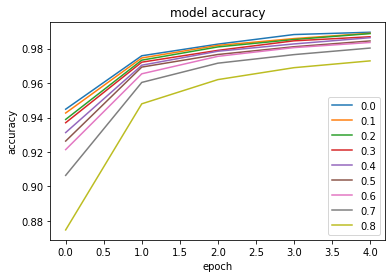

Model(0.0): 0 Treino: 0.989483 Teste: 0.980700
Model(0.1): 1 Treino: 0.988900 Teste: 0.979000
Model(0.2): 2 Treino: 0.988700 Teste: 0.980900
Model(0.3): 3 Treino: 0.986867 Teste: 0.978900
Model(0.4): 4 Treino: 0.986317 Teste: 0.974400
Model(0.5): 5 Treino: 0.984433 Teste: 0.978700
Model(0.6): 6 Treino: 0.983550 Teste: 0.979700
Model(0.7): 7 Treino: 0.980300 Teste: 0.979800
Model(0.8): 8 Treino: 0.972867 Teste: 0.978200


In [86]:
import matplotlib.pyplot as plt
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8'], loc='best')
plt.show()
for i in range(len(model)):
    print('Model(0.%d): %d Treino: %f Teste: %f' %(i,i, hist_all[i].history['acc'][4],m[i][1]))

De acordo com o teste, o modelo com Dropout de 0.2 obteve o melhor resultado.



##  Experimento 5

Por fim, será feito um teste com a implementação do BatchNormalization junto e no lugar do Dropout. Para este teste será aumentado o numero do epochs para observar a estabilização dos resultados.

In [90]:
model = [0,0,0]
hist_all={}
m= {}
print('Inicio do Experimento 5')
for i in range(len(model)):
    if i==0:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=15)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 0')
    if i==1:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=15)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 1')
    if i==2:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=15)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 2')

Inicio do Experimento 5
Epoch 1/15
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2000 - acc: 0.9402
Epoch 2/15
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0879 - acc: 0.9729
Epoch 3/15
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0621 - acc: 0.9809
Epoch 4/15
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0459 - acc: 0.9857
Epoch 5/15
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0377 - acc: 0.9880
Epoch 6/15
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0303 - acc: 0.9903
Epoch 7/15
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0272 - acc: 0.9913
Epoch 8/15
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0255 - acc: 0.9922
Epoch 9/15
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0222 - acc: 0.9930
Epoch 10/15
60000/60000 [========================

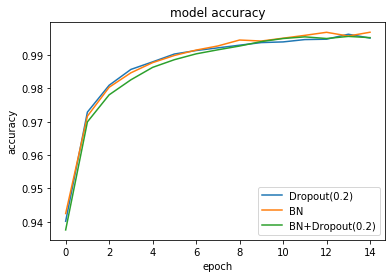

Model(Dropout(0.2)):
Treino: 0.995083 Teste: 0.979200 
Diferença: 0.015883 

Model(BN):
Treino: 0.996833 Teste: 0.981600 
Diferença: 0.015233 

Model(BN+Dropout(0.2)):
Treino: 0.995217 Teste: 0.982400 
Diferença: 0.012817 



In [93]:
import matplotlib.pyplot as plt
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
name = ['Dropout(0.2)','BN','BN+Dropout(0.2)']
plt.legend(name, loc='best')
plt.show()

for i in range(len(model)):
    print('Model(%s):'%(name[i]))
    print('Treino: %f Teste: %f ' %( hist_all[i].history['acc'][14], m[i][1]))
    print('Diferença: %f \n' %(hist_all[i].history['acc'][14]- m[i][1]))

Após 15 epochs observamos que a precisão adiquirida pelo BatchNormalization + Dropout foi superior, assim como a sua diferença entre a acurácia de treino e de teste foi menor.

## Experimento 6

Para finalizar o exercicio será  analizado a mudança do batch_size utilizado a mesma arquitetura com melhor desempenho no teste com 5 epochs.

In [94]:
model = [0,0,0,0]
hist_all={}
m= {}
print('Inicio do Experimento 5')
for i in range(len(model)):
    if i==0:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5, batch_size =32)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 0')
    if i==1:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5, batch_size =64)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 1')
    if i==2:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5, batch_size =128)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 2')
    if i==3:
        model[i] = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])

        model[i].compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

        hist = model[i].fit(x_train, y_train, epochs=5, batch_size =256)
        hist_all[i]=hist
        m[i] = model[i].evaluate(x_test, y_test)
        print('Fim do treinamento i = 3')

Inicio do Experimento 5
Epoch 1/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.2081 - acc: 0.9375
Epoch 2/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1017 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0713 - acc: 0.9781
Epoch 4/5
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0571 - acc: 0.9822
Epoch 5/5
10000/10000 [==============================] - 1s 113us/sample - loss: 0.0785 - acc: 0.9769
Fim do treinamento i = 0
Epoch 1/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2032 - acc: 0.9394
Epoch 2/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0915 - acc: 0.9718
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0605 - acc: 0.9810
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0463 - acc: 0.9856
Epoch 5/5
10000/10000 [==============

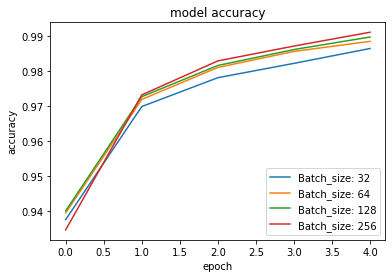

Model(Batch_size: 32):
Treino: 0.986417 Teste: 0.976900 

Model(Batch_size: 64):
Treino: 0.988467 Teste: 0.974700 

Model(Batch_size: 128):
Treino: 0.989700 Teste: 0.970300 

Model(Batch_size: 256):
Treino: 0.991067 Teste: 0.978500 



In [95]:
import matplotlib.pyplot as plt
for i in range(len(model)):
    plt.plot(hist_all[i].history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
name = ['Batch_size: 32','Batch_size: 64','Batch_size: 128','Batch_size: 256']
plt.legend(name, loc='best')
plt.show()

for i in range(len(model)):
    print('Model(%s):'%(name[i]))
    print('Treino: %f Teste: %f \n' %( hist_all[i].history['acc'][4], m[i][1]))

Por fim, o numero de Batch_size: 256 resultou na melhor precisão até o momento.

## Finalizando

Nesta etapa será utilizado a arquitetura mais promissora, com um numero maior de epochs (20) e batch_size igual a 256

In [99]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=20, batch_size =256)

model_json = model.to_json()
json_file = open("model_MLP.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_MLP.h5")
print("Model saved to disk")
os.getcwd()

Epoch 1/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2199 - acc: 0.9343
Epoch 2/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0876 - acc: 0.9736
Epoch 3/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0554 - acc: 0.9835
Epoch 4/20
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0399 - acc: 0.9879
Epoch 5/20
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0277 - acc: 0.9912
Epoch 6/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0229 - acc: 0.9929
Epoch 7/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0196 - acc: 0.9936
Epoch 8/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0173 - acc: 0.9945
Epoch 9/20
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0149 - acc: 0.9951
Epoch 10/20
60000/60000 [==============================] - 1s 24us/sample - loss: 

'C:\\Users\\T-Gamer\\Dropbox\\Aulas Doc\\EFC2\\Q3'

In [100]:
md = model.evaluate(x_test, y_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = md[metric_i]
    print('{}: {}'.format(metric_name, metric_value))  

10000/10000 [==============================] - 1s 114us/sample - loss: 0.0602 - acc: 0.9850
loss: 0.060177524138828764
acc: 0.9850000143051147
